In [1]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Job_Placement_Data.csv')

df.sample(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
129,M,76.70,Central,89.7,Others,Commerce,66.00,Comm&Mgmt,Yes,90.00,Mkt&Fin,68.55,Placed
133,M,73.00,Central,64.0,Others,Commerce,77.00,Comm&Mgmt,Yes,65.00,Mkt&HR,60.98,Placed
17,F,55.00,Central,67.0,Central,Commerce,64.00,Comm&Mgmt,No,60.00,Mkt&Fin,67.28,Not Placed
28,M,76.76,Others,76.5,Others,Commerce,67.50,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15,Placed
55,M,60.40,Central,66.6,Others,Science,65.00,Comm&Mgmt,No,71.00,Mkt&HR,52.71,Placed
50,F,75.20,Central,73.2,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed
61,M,84.20,Central,73.4,Central,Commerce,66.89,Comm&Mgmt,No,61.60,Mkt&Fin,62.48,Placed
208,F,43.00,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed
68,F,69.70,Central,47.0,Central,Commerce,72.70,Sci&Tech,No,79.00,Mkt&HR,59.24,Not Placed
84,M,70.00,Central,63.0,Others,Science,70.00,Sci&Tech,Yes,55.00,Mkt&Fin,62.00,Placed


In [4]:
df.shape


(215, 13)

In [5]:
df.isnull().sum()

,0
gender,0
ssc_percentage,0
ssc_board,0
hsc_percentage,0
hsc_board,0
hsc_subject,0
degree_percentage,0
undergrad_degree,0
work_experience,0
emp_test_percentage,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [7]:
df.gender.value_counts()


,count
gender,
M,139
F,76


In [8]:
df.ssc_percentage.value_counts()

,count
ssc_percentage,
62.00,11
63.00,10
67.00,9
52.00,9
73.00,9
...,...
69.70,1
80.92,1
83.00,1


<Axes: xlabel='hsc_percentage', ylabel='ssc_percentage'>

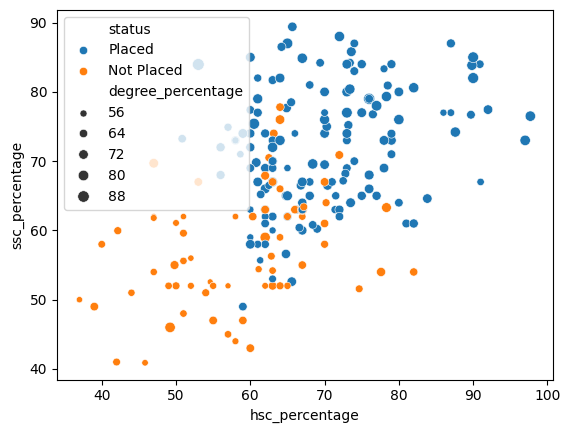

In [9]:

sns.scatterplot(x=df['hsc_percentage'], y=df['ssc_percentage'], hue=df['status'],size=df['degree_percentage'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


**Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ssc_board'] = label_encoder.fit_transform(df['ssc_board'])
df['hsc_board'] = label_encoder.fit_transform(df['hsc_board'])
df['hsc_subject'] = label_encoder.fit_transform(df['hsc_subject'])
df['undergrad_degree'] = label_encoder.fit_transform(df['undergrad_degree'])
df['work_experience'] = label_encoder.fit_transform(df['work_experience'])
df['specialisation'] = label_encoder.fit_transform(df['specialisation'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    int64  
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    int64  
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    int64  
 5   hsc_subject          215 non-null    int64  
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    int64  
 8   work_experience      215 non-null    int64  
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    int64  
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), int64(7), object(1)
memory usage: 22.0+ KB


In [20]:
df['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


In [21]:
df['status'] = label_encoder.fit_transform(df['status'])


#train test split

In [22]:
from sklearn.model_selection import train_test_split

x = df.drop('status',axis=1)
y= df['status']

x_train , x_test , y_train , y_test  = train_test_split(x,y, test_size=.2)

In [23]:
x_train.shape ,x_test.shape

((172, 12), (43, 12))

#StanderdScaling

In [27]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

StandardScaler_x_train = scale.fit_transform(x_train)
StandardScaler_x_test = scale.transform(x_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [31]:
from sklearn.linear_model import LogisticRegression

LOR = LogisticRegression()
LOR.fit(StandardScaler_x_train, y_train)

y_pred = LOR.predict(StandardScaler_x_test)

accuracy_score(y_test, y_pred)




0.8837209302325582

In [32]:
from sklearn.tree import DecisionTreeClassifier

DFT= DecisionTreeClassifier()
DFT.fit(StandardScaler_x_train, y_train)

y_pred = DFT.predict(x_train)

accuracy_score(y_train, y_pred)


1.0

In [33]:
#Cross Validation

cross_val_score(DFT, StandardScaler_x_train , y_train , cv=5).mean()


0.7673949579831933

In [35]:

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(StandardScaler_x_train, y_train)

y_pred = RFC.predict(StandardScaler_x_test)

accuracy_score(y_test, y_pred)



0.9069767441860465

In [36]:
cross_val_score(RFC, StandardScaler_x_train , y_train , cv=5).mean()


0.8603361344537814